# ****Heart disease prediction****
## Постановка задачи

В данном проекте исследуется датасет [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

Необходимо построить модель машинного обучения, которая по этим данным классифицирует, есть ли у пациента сердечное заболевание.

##Цели проекта

1.  **Понимание данных**: Проведение всестороннего разведочного анализа данных (EDA) для выявления закономерностей, распределений признаков и взаимосвязей между ними и целевой переменной.
2.  **Предобработка данных**: Подготовка данных для обучения моделей машинного обучения.
3.  **Построение и сравнение моделей**: Обучение и оценка производительности нескольких различных моделей машинного обучения (Логистическая регрессия, K-ближайших соседей) для задачи классификации.
4.  **Выбор оптимальной модели**: Определение наилучшей модели для предсказания сердечных заболеваний на основе полученных метрик и ее интерпретация.
4.  **Формулирование рекомендаций**: Предложение дальнейших шагов для улучшения модели и ее потенциального применения.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('heart_disease_uci.csv')
data.head()
#последнее поле num содержит стадии заболевания (от 0 до 4)
#в дальнейшем преобразуем в бинарное по принципу: если 0 - заболевания нет, если 1|2|3|4 - заболевание есть, так это поле будет таргетным

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
print("Первые 5 строк датасета:")
print(data.head())

print("\nИнформация о датасете:")
data.info()

print("\nСтатистическое описание числовых признаков:")
print(data.describe())

Первые 5 строк датасета:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4          

In [4]:
print("\nПроверка на пропущенные значения:")
print(data.isnull().sum()[data.isnull().sum() > 0])
if data.isnull().sum().sum() == 0:
    print("Пропущенные значения отсутствуют.")


Проверка на пропущенные значения:
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


In [5]:
#кодирование категориальных признаков и преобразование логических значений в числовые
data_1 = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

def map_boolean_to_numeric(value):
    return 1 if value else 0

columns_to_encode = ['sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
                     'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
                     'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
                     'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat',
                     'slope_upsloping', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0',
                     'thal_fixed defect', 'thal_normal', 'thal_reversable defect']

data_1[columns_to_encode] = data_1[columns_to_encode].applymap(map_boolean_to_numeric)

data_1.head()

<ipython-input-5-5ecc09ae64f2>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_1[columns_to_encode] = data_1[columns_to_encode].applymap(map_boolean_to_numeric)


,id,age,dataset,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,...,slope_downsloping,slope_flat,slope_upsloping,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,Cleveland,145.0,233.0,150.0,2.3,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,2,67,Cleveland,160.0,286.0,108.0,1.5,2,0,1,...,0,1,0,0,0,0,1,0,1,0
2,3,67,Cleveland,120.0,229.0,129.0,2.6,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,4,37,Cleveland,130.0,250.0,187.0,3.5,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4,5,41,Cleveland,130.0,204.0,172.0,1.4,0,1,0,...,0,0,1,1,0,0,0,0,1,0


# Exploratory data analysis

Text(0.5, 0, 'Age (years)')

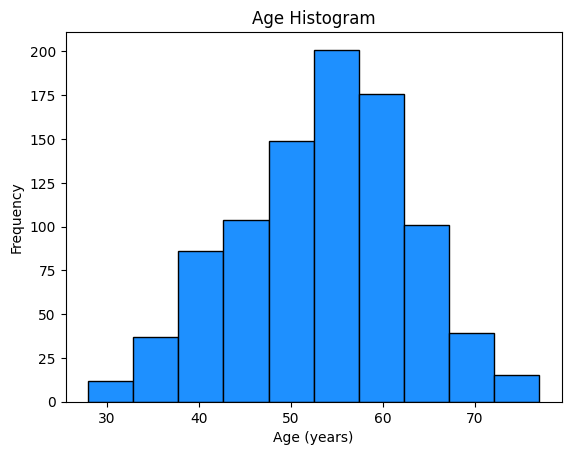

In [ ]:
# Age histogram
data_1['age'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Age Histogram')
plt.xlabel('Age (years)')

Text(0.5, 0, 'BPS')

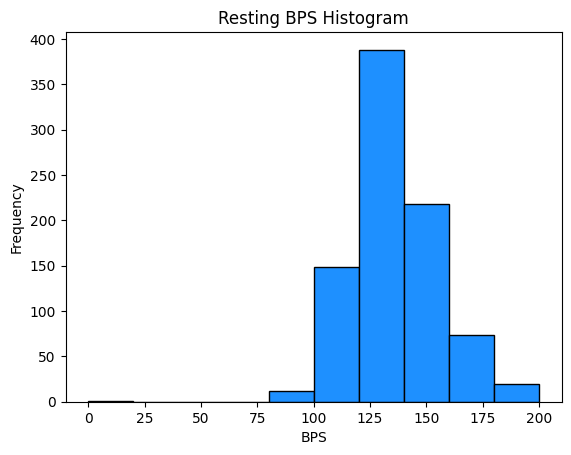

In [ ]:
# Resting BPS histogram
data_1['trestbps'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Resting BPS Histogram')
plt.xlabel('BPS')

Text(0.5, 0, 'Cholesteral')

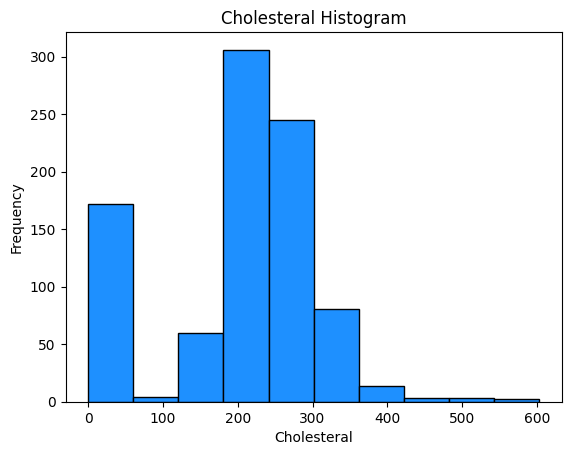

In [ ]:
# Cholesterol histogram
data_1['chol'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Cholesteral Histogram')
plt.xlabel('Cholesteral')

Text(0.5, 0, 'Max Heart Rate')

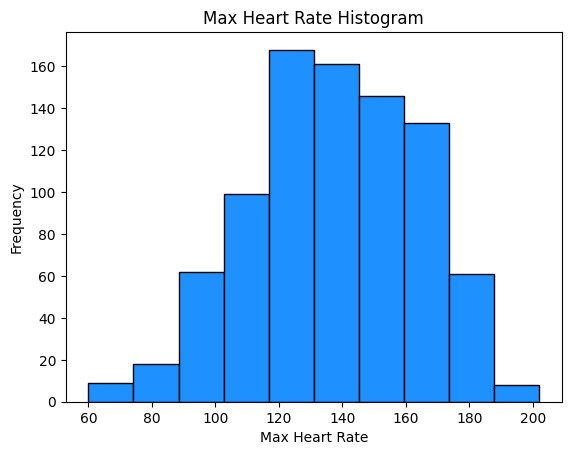

In [ ]:
# Maximum heart rate
data_1['thalch'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Max Heart Rate Histogram')
plt.xlabel('Max Heart Rate')

Text(0.5, 1.0, 'Sex Distribution')

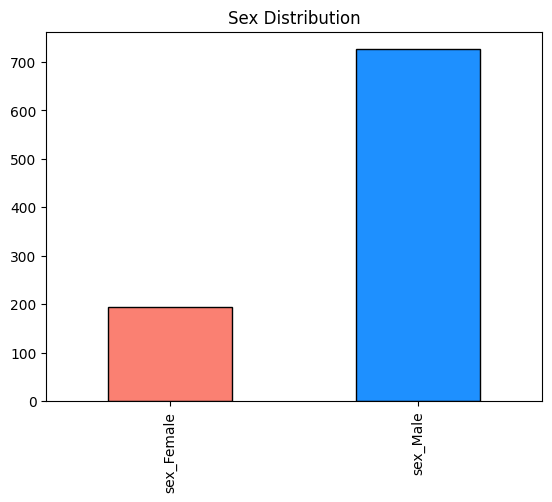

In [ ]:
# Sex distribution
sex_counts = data_1[['sex_Female', 'sex_Male']].sum()
sex_counts.plot(kind='bar', color=['salmon', 'dodgerblue'], edgecolor='black')
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Types of Chest Pain')

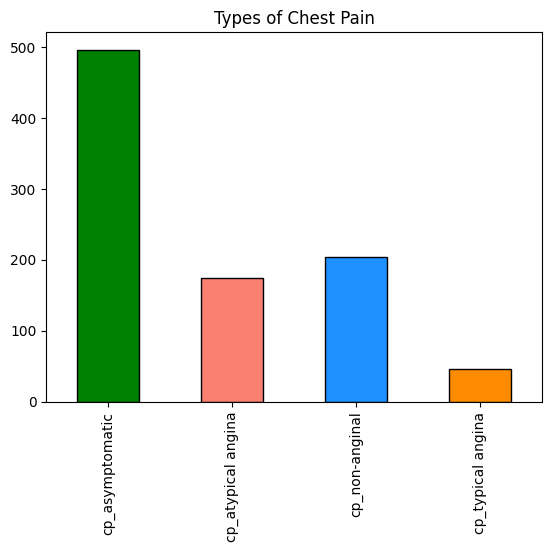

In [ ]:
# Chest pain distribution
sex_counts = data_1[['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']].sum()
sex_counts.plot(kind='bar', color=['green', 'salmon', 'dodgerblue', 'darkorange'], edgecolor='black')
plt.title('Types of Chest Pain')

Text(0.5, 1.0, 'Number of Major Vessesls Colored  by Flouroscopy')

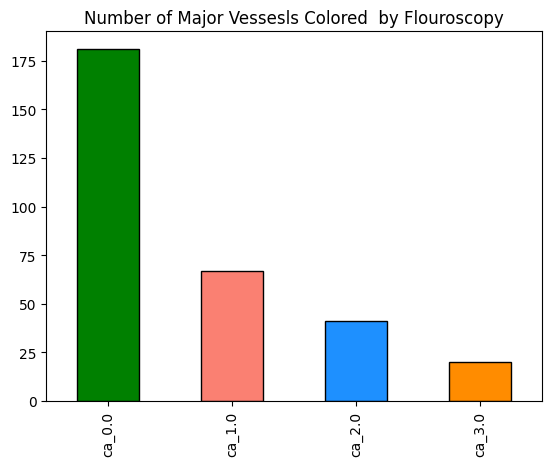

In [ ]:
# Number of major vessels colored by flouroscopy count
sex_counts = data_1[['ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0']].sum()
sex_counts.plot(kind='bar', color=['green', 'salmon', 'dodgerblue', 'darkorange'], edgecolor='black')
plt.title('Number of Major Vessesls Colored  by Flouroscopy')

# Построение моделей

Теперь, когда мы ознакомились с распределением непрерывных и категориальных переменных, можно попробовать применить модели машинного обучения для предсказания целевого класса.

В наборе данных UCI о сердечных заболеваниях существует 5 классов:

0 — отсутствие сердечного заболевания

1 — заболевание 1 стадии

2 — заболевание 2 стадии

3 — заболевание 3 стадии

4 — заболевание 4 стадии

Для начала попробуем упростить задачу до бинарной классификации: предсказывать наличие заболевания (метки 1–4) или его отсутствие (0).

Text(0.5, 1.0, 'Binary Class Distribution (0 = No HD, 1 = HD)')

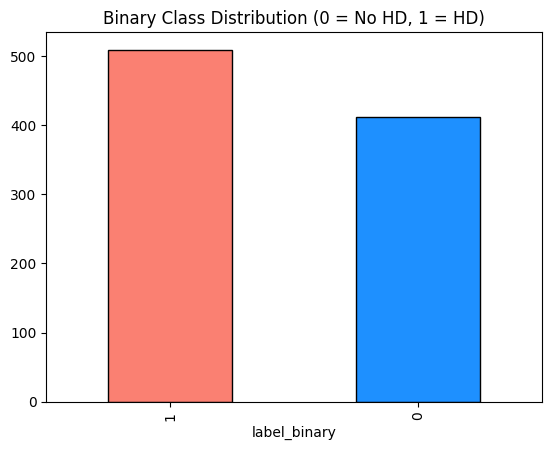

In [6]:
data_2 = data_1.drop(['id', 'dataset'], axis=1)

# Создаем новый столбец label_binary для бинарной классификации:
data_2['label_binary'] = np.where(data_2['num'] == 0, 0, 1)

# Распределение классов
binary_counts = data_2['label_binary'].value_counts()
binary_counts.plot(kind='bar', color=['salmon', 'dodgerblue'], edgecolor='black')
plt.title('Binary Class Distribution (0 = No HD, 1 = HD)')

In [7]:
# Масштабирование данных
scaler = StandardScaler()
data_2[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(data_2[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])

data_2 = data_2.drop(['num'], axis=1)

print('Number of rows before removing NaNs: ', len(data_2))

data_2 = data_2.dropna()

print('Number of rows before removing NaNs: ', len(data_2))

data_2.head()

Number of rows before removing NaNs:  920
Number of rows before removing NaNs:  827


,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,slope_flat,slope_upsloping,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_fixed defect,thal_normal,thal_reversable defect,label_binary
0,1.007386,0.675287,0.305908,0.480653,1.303159,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1.432034,1.462483,0.784599,-1.140262,0.569611,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,1
2,1.432034,-0.636705,0.269780,-0.329805,1.578239,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,1
3,-1.752828,-0.111908,0.459450,1.908602,2.403480,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,-1.328180,-0.111908,0.043982,1.329704,0.477918,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [8]:
# Разделение на обучающую и тестовую выборки
y = data_2['label_binary']
X = data_2.drop(['label_binary'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**knn**

K with highest accuracy 11


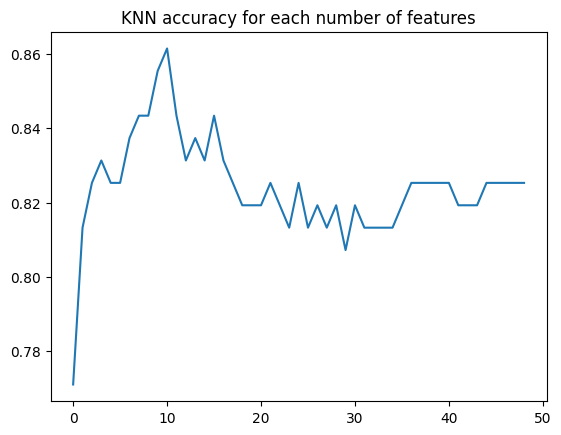

In [ ]:
# поиск оптимального количества соседей
knn_accuracies = []
for n in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors = n)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    knn_accuracies.append(accuracy)

plt.plot(knn_accuracies)
plt.title('KNN accuracy for each number of features')

print(f'K with highest accuracy {np.argmax(knn_accuracies)+1}')

Accuracy: 0.8554216867469879


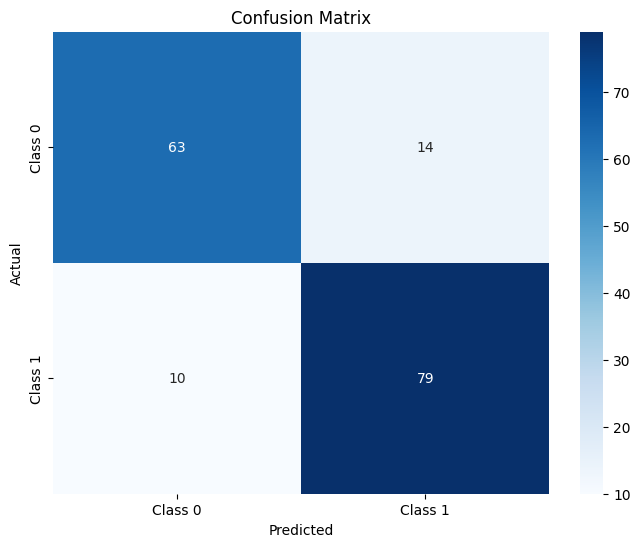

In [ ]:
# Обучаем классификатор с 10 соседями
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)


# Оценка качества
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_rep)

# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**logistic regression**

In [9]:
# Линейная регрессия с l1 регуляризацией
lr_accuracies = []

c_params = [0.001, 0.01, 0.1, 1, 5, 10]

# Создаем логистическую регрессию
for c_param in c_params:

    # Fit model and calculate training accuracy
    lr = LogisticRegression(penalty='l1', C=c_param, solver='liblinear')
    lr.fit(X_train, y_train)
    lr_accuracies.append(lr.score(X_test, y_test))

print('----L1 Penalty Results----')
print(f'Highest accuracy: {max(lr_accuracies)}')
print(f'C with highest accuracy {np.argmax(lr_accuracies)+1}')

----L1 Penalty Results----
Highest accuracy: 0.8313253012048193
C with highest accuracy 3


In [10]:
# Линейная регрессия с l2 регуляризацией

lr_accuracies = []

c_params = [0.001, 0.01, 0.1, 1, 5, 10]

for c_param in c_params:

    lr = LogisticRegression(penalty='l2', C=c_param, solver='liblinear')
    lr.fit(X_train, y_train)
    lr_accuracies.append(lr.score(X_test, y_test))

print('----L2 Penalty Results----')
print(f'Highest accuracy: {max(lr_accuracies)}')
print(f'C with highest accuracy {np.argmax(lr_accuracies)+1}')

----L2 Penalty Results----
Highest accuracy: 0.8253012048192772
C with highest accuracy 2


In [11]:
# Линейная регрессия без регуляризации

lr_accuracies = []

c_params = [0.001, 0.01, 0.1, 1, 5, 10]

for c_param in c_params:

    lr = LogisticRegression(penalty=None, C=c_param, solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_accuracies.append(lr.score(X_test, y_test))

print('----No Penalty Results----')
print(f'Highest accuracy: {max(lr_accuracies)}')
print(f'C with highest accuracy {np.argmax(lr_accuracies)+1}')

----No Penalty Results----
Highest accuracy: 0.8132530120481928
C with highest accuracy 1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


# Выводы

Логистическая регрессия показала довольно хорошие результаты, хотя точность на тестовой выборке была на несколько процентов ниже, чем у KNN.


*  Мы смогли добиться точности в 85% при прогнозировании риска сердечных заболеваний с помощью простой модели-классификатора, что является хорошим результатом для медицинского приложения.

* Матрица ошибок модели KNN показывает, что модель допускает относительно мало ложноположительных (10) и ложноотрицательных (14) срабатываний, что очень важно для данной задачи


* Высокая точность KNN говорит о том, что в пространстве признаков классы достаточно хорошо разделены, и ближайшие соседи, как правило, принадлежат к одному классу.В то время как логистическая регрессия — линейная модель, она предполагает, что классы разделимы прямой, поэтому точность хуже.


*  Логистическая регрессия показала менее высокие результаты на этом наборе данных.
1.   При этом L1-регуляризация даёт наилучшую точность. Это говорит о том, что не все признаки важны, и модель работает лучше, когда ненужные признаки исключаются.
2.   При этом без регуляризации — получаем худший результат.Из этого следует, что регуляризация в принципе необходима на этих данных, иначе модель страдает от переобучения.




